# OIIP Calculation

MONTE CARLO SIMULATION FOR OIL-INITIALLY-IN-PLACE (OOIP) using a Covariance 1D Array

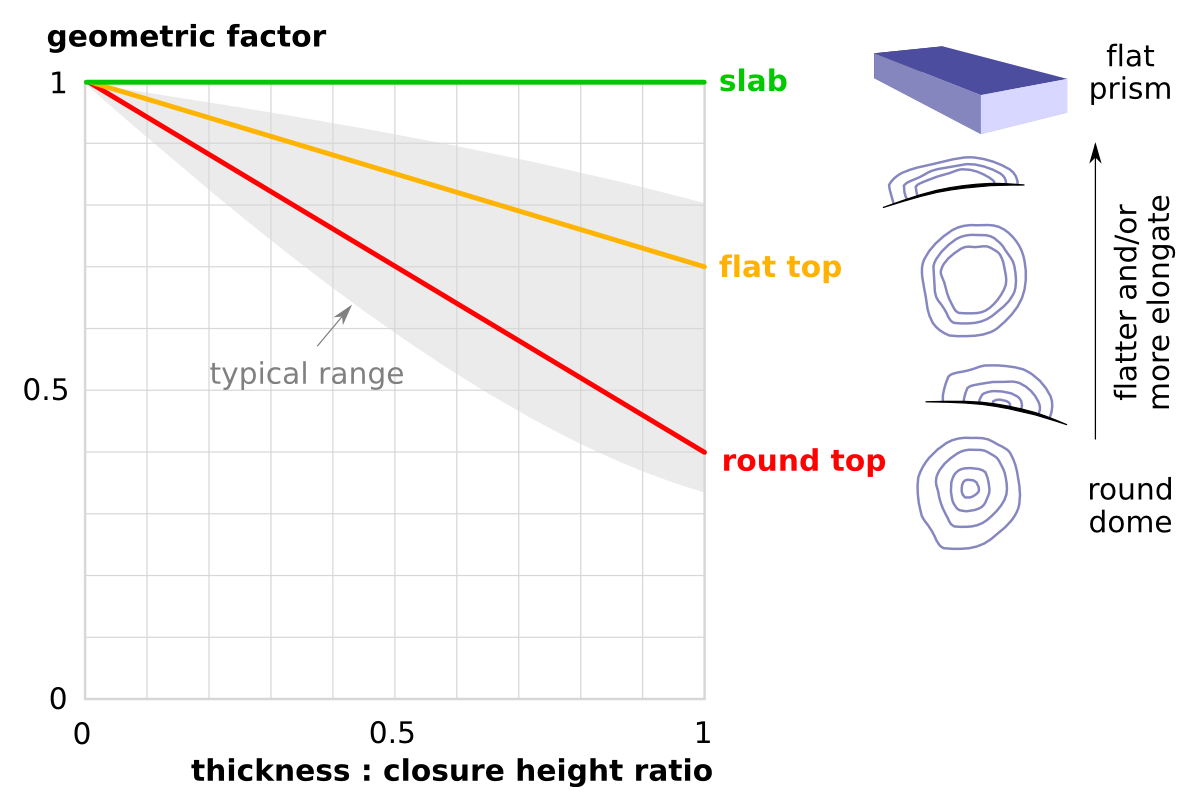

In [2]:
# Display an image file illustrating the Geometric Correction  Factor
from IPython import display
display.Image("http://subsurfwiki.org/images/6/66/Geometric_correction_factor.png", width=600)

In [3]:
# Geometric_Correction_Factor calculation based on thickness and height of prospect

thick = 80
height = 100
ratio = thick / height

# Define shape of prospect feature; 'flat', 'round' otherwise it's a slab of 1
top = 'flat'

if top == 'round':
    g = -0.6 * ratio + 1
elif top == 'flat':
    g = -0.3 * ratio + 1
else:
    g = 1

g
print("The Geometric Correction_Factor =", g)

The Geometric Correction_Factor = 0.76


In [4]:
# MONTE CARLO SIMULATION FOR OIL-INITIALLY-IN-PLACE (OOIP) using a Covariance 1D Array

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import statistics   # import statistics library

# Number of cases
N = 100000

# mean : 1-D array_like, of length N
mean_vector = np.array([2.13,   # Area in km2
                        g,   # Geometric_Correction_Factor (between 0 & 1)
                        13.65,  # Thickness in m
                        0.80,   # NtG  
                        0.22,   # Porosity
                        0.70,   # Soil
                        1.45])  # FVF

# covariance : 1-D array_like, of symmetrical shape (N)                        
covariance = np.diag([0.5,      # Area in km2
                      0.10,     # Geometric_Correction_Factor (between 0 & 1)
                      1.85,     # Thickness in m
                      0.10,     # NtG 
                      0.05,     # Porosity
                      0.10,     # Soil
                      0.05])    # FVF

# Draw random samples from a multivariate normal distribution. Returns an ndarray
simulated = abs(np.random.multivariate_normal(mean_vector, covariance, size = N))

# .T is just the np.transpose()
area, geometric_correction_factor, thickness, ntg, por, shc, fvf = simulated.T

# Calculate GRV & OIIP
grv = (area * thickness * geometric_correction_factor * 1e6)   # grv is in cubic meters
OIIP_m3 = (grv*ntg*por*shc)/fvf         # OIIP is in cubic meters
OIIP = (grv*ntg*por*shc*6.29/1E6)/fvf   # OIIP is in mmbbls

# Python Statistics
print("The minimum OIIP = %.1f mmbbls" % (min(OIIP)))
print("The maximum OIIP = %.1f mmbbls" % (max(OIIP)))
print("The mean OIIP = %.1f mmbbls" % (statistics.mean(OIIP)))                     #  Arithmetic mean (“average”) of data.
print ("The std OIIP = %.1f mmbbls" % np.std(OIIP))
print("The harmonic mean OIIP = %.1f mmbbls" % (statistics.harmonic_mean(OIIP)))   #  Harmonic mean of data.
print("The median OIIP = %.1f mmbbls" % (statistics.median(OIIP)))                 #  Median (middle value) of data.
#print("The median_low OIIP = %.1f mmbbls" % (statistics.median_low(OIIP)))        #  Low median of data.
#print("The median_high OIIP = %.1f mmbbls" % (statistics.median_high(OIIP)))      #  High median of data.
print("The median_grouped OIIP = %.1f mmbbls" % (statistics.median_grouped(OIIP))) #  Median or 50th percentile, of grouped data
print("The OIIP std dev = %.1f mmbbls" % (statistics.stdev(OIIP)))                 #  Sample standard deviation of data.
#print("The OIIP pstd dev = %.1f mmbbls" % (statistics.pstdev(OIIP)))              #  Population standard deviation of data..
print("P99 OIIP = %.1f mmbbls" % (np.percentile(OIIP, 1))) 
print("P90 OIIP = %.1f mmbbls" % (np.percentile(OIIP, 10))) 
print("P50 OIIP = %.1f mmbbls" % (np.percentile(OIIP, 50))) 
print("P10 OIIP = %.1f mmbbls" % (np.percentile(OIIP, 90))) 
print("P01 OIIP = %.1f mmbbls" % (np.percentile(OIIP, 99)))



The minimum OIIP = 0.0 mmbbls
The maximum OIIP = 469.5 mmbbls
The mean OIIP = 14.4 mmbbls
The std OIIP = 19.1 mmbbls
The harmonic mean OIIP = 0.3 mmbbls
The median OIIP = 7.9 mmbbls
The median_grouped OIIP = 7.4 mmbbls
The OIIP std dev = 19.1 mmbbls
P99 OIIP = 0.0 mmbbls
P90 OIIP = 0.8 mmbbls
P50 OIIP = 7.9 mmbbls
P10 OIIP = 35.4 mmbbls
P01 OIIP = 90.4 mmbbls


## Cumulative Distribution Function (CDF)

### Using histograms to plot a cumulative distribution

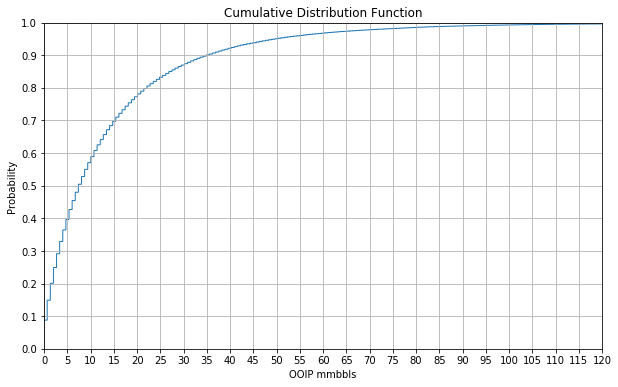

In [5]:
# PLot Cumulative Distribution Function
fig = plt.figure(figsize=(10,6))
plt.ylabel('Probability')
plt.xlabel('OOIP mmbbls')
plt.title('Cumulative Distribution Function')
plt.xlim(0,120)
plt.ylim(0.0,1.0)
plt.locator_params(axis='x', nbins=40)
plt.locator_params(axis='y', nbins=10)
plt.grid(True)

# Plot the data
plt.hist(OIIP, bins=700, density=True, cumulative=True, histtype='step')
plt.show()